# Regression model diagnostics plots example

Fit a LightGBM regression model to the Boston house-prices dataset and generate diagnostic plots for the test data using plotnine.

The plots are those often used for classical linear regression models (with their associated assumptions about normally distributed residuals and homoscedasticity). While other regression models do not have these explicit assumptions, there is still value in examining the distribution of residuals.

In [1]:
import lightgbm as lgb
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from regression_diagnostics import RegressionDiagnostics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the boston house-prices dataset and fit a regression model
boston = load_boston()

X = pd.DataFrame(boston["data"], columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

# Generate diagnostic plots
diagnostics = RegressionDiagnostics(lgb_model)
diagnostics.fit(X_test, y_test)

RegressionDiagnostics(model=LGBMRegressor(boosting_type='gbdt',
                                          class_weight=None,
                                          colsample_bytree=1.0,
                                          importance_type='split',
                                          learning_rate=0.1, max_depth=-1,
                                          min_child_samples=20,
                                          min_child_weight=0.001,
                                          min_split_gain=0.0, n_estimators=100,
                                          n_jobs=-1, num_leaves=31,
                                          objective=None, random_state=None,
                                          reg_alpha=0.0, reg_lambda=0.0,
                                          silent=True, subsample=1.0,
                                          subsample_for_bin=200000,
                                          subsample_freq=0))

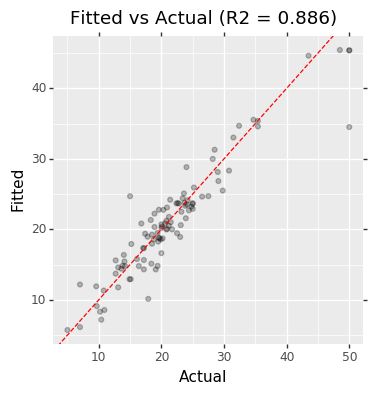

<ggplot: (-9223371919785777106)>

In [3]:
# Fitted values against actual values
diagnostics.fitted_actual()

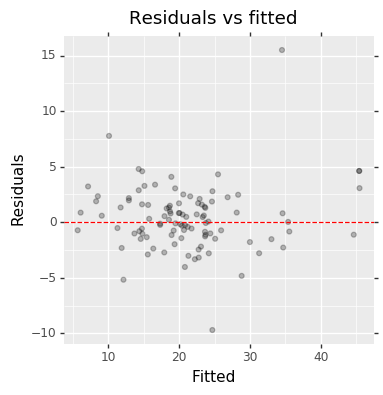

<ggplot: (117069037667)>

In [4]:
# Residuals against fitted values
diagnostics.residuals_fitted()

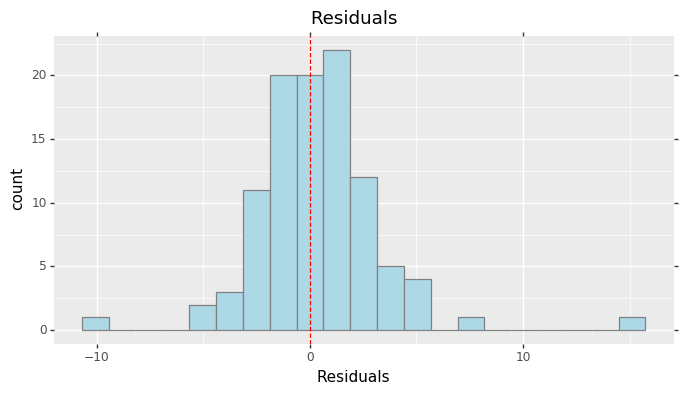

<ggplot: (-9223371919783544053)>

In [5]:
# Histogram of residuals
diagnostics.hist_residuals()

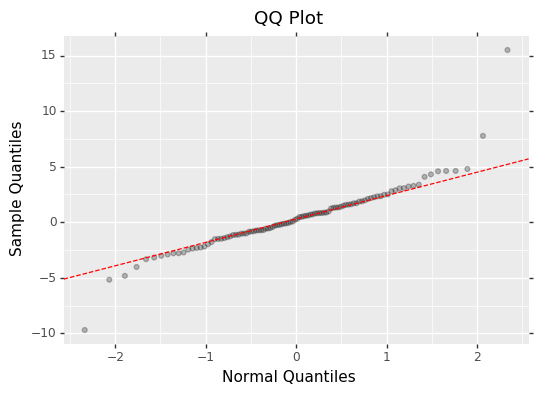

<ggplot: (-9223371919785743721)>

In [6]:
# QQ plot of residuals
diagnostics.qq_plot()